In [3]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
# Loading stroke prediction from file from Kaggle
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
# 1
# Use the describe() method to generate descriptive statistics
statistics = df.describe()

# Print the statistics
print(statistics)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [6]:
# Showing specifically bmi
print(df['bmi'].describe())

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


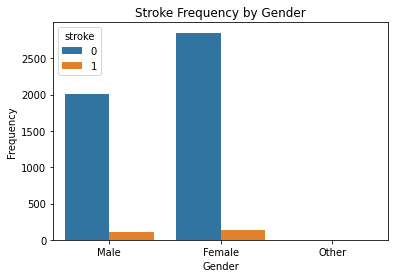

In [7]:
#2
# Creating a barplot using Seaborn showing stroke frequency by gender
sb.countplot(x='gender', hue='stroke', data=df)
# Add a title and labels to the plot
mpl.title('Stroke Frequency by Gender')
mpl.xlabel('Gender')
mpl.ylabel('Frequency')
mpl.show()

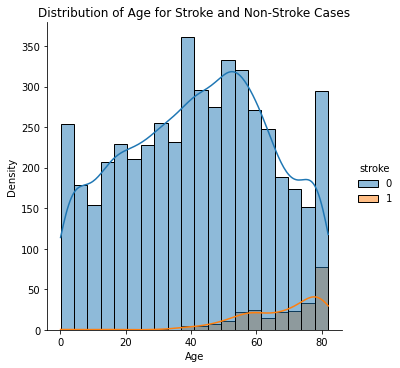

In [8]:
#3
# Create a distribution plot of age for stroke and non-stroke cases
sb.displot(x='age', hue='stroke', data=df, kde=True)
# Add a title and labels to the plot
mpl.title('Distribution of Age for Stroke and Non-Stroke Cases')
mpl.xlabel('Age')
mpl.ylabel('Density')

# Show the plot
mpl.show()

In [9]:
#The results show as age goes up, frequency of strokes goes up

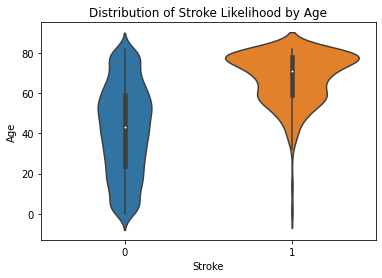

In [10]:
#4
# Subset the DataFrame to include only the stroke variable and age variable
df_violin = df[['stroke', 'age']]

# Create a violin plot of stroke likelihood by age
sb.violinplot(x='stroke', y='age', data=df_violin)

# Customize the plot with labels and a title
mpl.xlabel('Stroke')
mpl.ylabel('Age')
mpl.title('Distribution of Stroke Likelihood by Age')

# Show the plot
mpl.show()

In [11]:
#5 This dataset is inbalanced because the number of people who did not have a stroke is way too different from 
# the number of people who did have a stroke

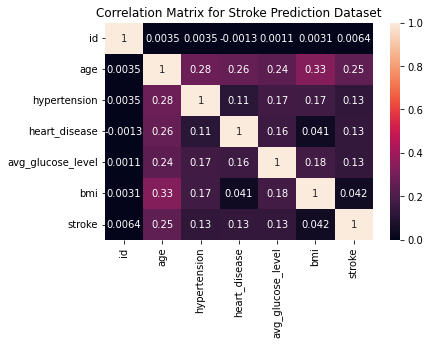

In [12]:
#6 # Calculate the correlation coefficients between all pairs of variables
corr_matrix = df.corr()

# Create a heatmap of the correlation coefficients
sb.heatmap(corr_matrix, annot=True)

# Customize the plot with a title
mpl.title('Correlation Matrix for Stroke Prediction Dataset')

# Show the plot
mpl.show()

#This heatmap shows that age and bmi have the highest correlation. The lowest correlation is between bmi and heart disease.

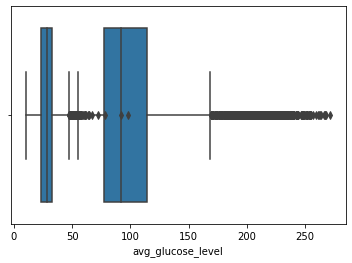

In [13]:
#7
# Identify the outliers in the BMI and Average_Glucose columns
sb.boxplot(x=df['bmi'])
sb.boxplot(x=df['avg_glucose_level'])

# Determine a threshold for identifying outliers based on the IQR method
q1 = df['bmi'].quantile(0.10)
q3 = df['bmi'].quantile(0.90)
iqr = q3 - q1
bmi_threshold = q1 - 1.5 * iqr

q1 = df['avg_glucose_level'].quantile(0.10)
q3 = df['avg_glucose_level'].quantile(0.90)
iqr = q3 - q1
glucose_threshold = q3 + 1.5 * iqr

# Remove the outliers from the DataFrame using boolean indexing
df = df[~((df['bmi'] < bmi_threshold) | (df['avg_glucose_level'] > glucose_threshold))]


In [14]:
#8
# calculate the mean BMI value
mean_bmi = df['bmi'].mean()

# fill in the missing BMI values with the mean value
df['bmi'] = df['bmi'].fillna(mean_bmi)

In [15]:
# 9
# create a LabelEncoder object
le = LabelEncoder()

# iterate over each column in the dataframe
for col in df.columns:
    # check if the column is of object data type
    if df[col].dtype == 'object':
        # use the LabelEncoder to transform the column values into numerical values
        df[col] = le.fit_transform(df[col])

print(df)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               1             228.69  36